# Compte rendu du projet MADI


Seddar mohand oubelaid
## Création de la classe Factor Graph :

Dans cette partie nous avons créé une classe Factor Graph, cette classe représente un **Factor Graph** , et qui est initilisé à travers un objet de type **Réseau Bayésien**, cette classe contient des noeuds de type **variable** ainsi, que des noeuds de type **Factor** pour stocker les tableaux de potentiel.


In [1]:
%reload_ext autoreload
%autoreload 2
from projet_madi import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pydotplus as dot
from IPython.display import SVG
import numpy as np


### Factor Graph

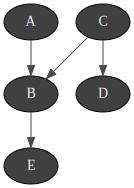

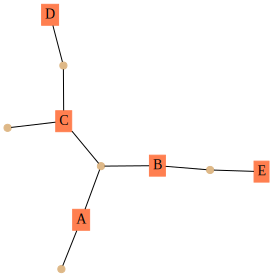

In [2]:
# construction de bn en forme d'un arbre
bn_tree=gum.fastBN("A->B<-C->D->E<-B")
bn_tree.eraseArc("D","E")
gnb.showBN(bn_tree)
# construction de factor graph
gf_tree = FactorGraph();
gf_tree.build(bn_tree);
# show
g=dot.graph_from_dot_data(gf_tree.show())
SVG(g.create_svg())

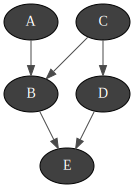

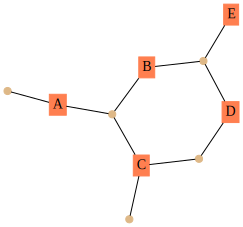

In [3]:
bn=gum.fastBN("A->B<-C->D->E<-B")
gnb.showBN(bn)
# construction de factor graph
gf = FactorGraph();
gf.build(bn);

# show
g=dot.graph_from_dot_data(gf.show())
SVG(g.create_svg())


### TreeSumProductInference

In [4]:
%reload_ext autoreload
%autoreload 2

# TreeSumProductInference
spi=TreeSumProductInference(gf_tree) # Crée une instance d'inférence
spi.makeInference()         # effectue les calculs de tous les messages

# LazyPropagation
ie=gum.LazyPropagation(bn_tree)
ie.makeInference()

print("bn.LazyPropagation:")
gnb.sideBySide(ie.posterior(0),ie.posterior(1),ie.posterior(2),ie.posterior(3),ie.posterior(4))
print("Tree Sum Product Inference, argmax =", spi.argmax())
gnb.sideBySide(spi.posterior(0),spi.posterior(1),spi.posterior(2),spi.posterior(3),spi.posterior(4))


bn.LazyPropagation:


Tree Sum Product Inference, argmax = {'A': 0, 'B': 1, 'C': 0, 'D': 0, 'E': 1}


### TreeSumProductInference addEvidence

In [5]:
%reload_ext autoreload
%autoreload 2

print("Inference avec evidence:")
# pour comparer
ie=gum.LazyPropagation(bn_tree)
ie.addEvidence(2,1)
ie.addEvidence(3,0)
ie.makeInference()
#gnb.showPotential(ie.posterior(4))

spi=TreeSumProductInference(gf_tree) # Crée une instance d'inférence
spi.addEvidence({"C":1,"D":0})
spi.makeInference()         # effectue les calculs de tous les messages
#gnb.showPotential(spi.posterior(4))

print("bn.LazyPropagation:")
gnb.sideBySide(ie.posterior(0),ie.posterior(1),ie.posterior(2),ie.posterior(3),ie.posterior(4))
print("Tree Sum Product Inference, argmax =", spi.argmax())
gnb.sideBySide(spi.posterior(0),spi.posterior(1),spi.posterior(2),spi.posterior(3),spi.posterior(4))


Inference avec evidence:
bn.LazyPropagation:


Tree Sum Product Inference, argmax = {'A': 0, 'B': 1, 'C': 1, 'D': 0, 'E': 1}


### LBPSumProductInference 

In [6]:
%reload_ext autoreload
%autoreload 2

ie=gum.LoopyBeliefPropagation(bn)
ie.makeInference()

spi=LBPSumProductInference(gf) # Crée une instance d'inférence
spi.makeInference()         # effectue les calculs de tous les messages

print("gum. Loopy Belief Propagation:")
gnb.sideBySide(ie.posterior(0),ie.posterior(1),ie.posterior(2),ie.posterior(3),ie.posterior(4))
print("LBP Sum Product Inference, argmax =", spi.argmax())
gnb.sideBySide(spi.posterior(0),spi.posterior(1),spi.posterior(2),spi.posterior(3),spi.posterior(4))


gum. Loopy Belief Propagation:


LBP Sum Product Inference, argmax = {'A': 0, 'B': 1, 'C': 1, 'D': 0, 'E': 0}


### LBPSumProductInference  AddEvidence

In [8]:
%reload_ext autoreload
%autoreload 2

# pour comparer
print("Inference LBP dans PyAgrum:")
ie=gum.LoopyBeliefPropagation(bn)
ie.addEvidence(2,1)
ie.addEvidence(3,0)
ie.makeInference()

spi=LBPSumProductInference(gf) # Crée une instance d'inférence
spi.addEvidence({"C":1,"D":0})
spi.makeInference()         # effectue les calculs de tous les messages


gnb.sideBySide(ie.posterior(0),ie.posterior(1),ie.posterior(2),ie.posterior(3),ie.posterior(4))
gnb.sideBySide(spi.posterior(0),spi.posterior(1),spi.posterior(2),spi.posterior(3),spi.posterior(4))

Inference LBP dans PyAgrum:


### TreeMaxProductInference
Pour vérifier cette méthode, on invente une instance où le argmax p(X) n'est pas egal aux {argmax p(X1),argmax p(x2),...}

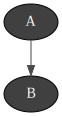

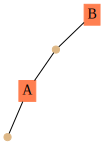

In [12]:
# construction de bn en forme d'un arbre
bn_tree1=gum.fastBN("A->B")
gnb.showBN(bn_tree1)
bn_tree1.cpt(0).fillWith(1)
bn_tree1.cpt(1).fillWith([0.4,0.3,0.01,0.19])
gnb.sideBySide(bn_tree1.cpt(0),bn_tree1.cpt(1))
# construction de factor graph
gf_tree1 = FactorGraph();
gf_tree1.build(bn_tree1);
# show
g=dot.graph_from_dot_data(gf_tree1.show())
SVG(g.create_svg())

In [14]:
%reload_ext autoreload
%autoreload 2

print("Probabilite jointe")
pX = spi.posterior(0)*spi.posterior(1)
gnb.showPotential(pX)
print("pX.argmax() = ",pX.argmax())
print("px.max() = ",pX.max())

spi=TreeMaxProductInference(gf_tree1) # Crée une instance d'inférence
spi.makeInference()         # effectue les calculs de tous les messages
spi.argmax()

print("Tree Max Product Inference, argmax =", spi.argmax())
gnb.sideBySide(spi.posterior(0),spi.posterior(1))


# TreeSumProductInference
ie=TreeSumProductInference(gf_tree1) # Crée une instance d'inférence
ie.makeInference()         # effectue les calculs de tous les messages

print("Tree Sum Product Inference, argmax =", ie.argmax())
gnb.sideBySide(ie.posterior(0),ie.posterior(1));#ie.posterior(2),ie.posterior(3),ie.posterior(4))



#print("test")
#for key,cpt in spi.dict_dict_cpt[0].items():
#    gnb.showPotential(cpt)

Probabilite jointe


pX.argmax() =  [{'B': 0, 'A': 0}]
px.max() =  0.16000000000000003
Tree Max Product Inference, argmax = {'A': 0, 'B': 0}


Tree Sum Product Inference, argmax = {'A': 0, 'B': 1}


### TreeMaxSumInference
On utilise la meme instance precedente.

In [ ]:
%reload_ext autoreload
%autoreload 2
print("Probabilite jointe")
gnb.showPotential(gf_tree1.bn.cpt(0)*gf_tree1.bn.cpt(1))

# TreeSumProductInference
ie=TreeSumProductInference(gf_tree1) # Crée une instance d'inférence
ie.makeInference()         # effectue les calculs de tous les messages

spi = TreeMaxSumInference(gf_tree1)
spi.makeInference()
print("Tree Max Sum Inference, argmax =", spi.argmax())
gnb.sideBySide(spi.posterior(0),spi.posterior(1));


### LBPMaxSumInference

In [ ]:
%reload_ext autoreload
%autoreload 2

print("Probabilite jointe")
gnb.showPotential(gf_tree1.bn.cpt(0)*gf_tree1.bn.cpt(1))

spi = LBPMaxSumInference(gf_tree1)
spi.makeInference()
print("Tree Max Sum Inference, argmax =", spi.argmax())
gnb.sideBySide(spi.posterior(0),spi.posterior(1));